In [1]:
import ta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import akshare as ak
from transformer import *
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [2]:
df_na  = get_data(symbol='106.TTE', start_date='20210101', end_date="20250330")
scaler = MinMaxScaler()
x_values = scaler.fit_transform(df_na.values)

/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/transformer.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roc'] = ta.momentum.roc(close=df.close) # Rate of Change (ROC)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/transformer.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'] = ta.momentum.rsi(close=df.close) # Relative Strength Index (RSI)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/transformer.py:30

In [3]:
TIMESTEP = 32
y_values = x_values[:,0]
x_values = x_values[:,1:]


def create_time_series_data(X, time_steps):
    X_t = []
    for i in range(len(X) - time_steps):
        X_t.append(X[i:i + time_steps])  # 时间步数据
        
    return np.array(X_t)

x_values = create_time_series_data(x_values , TIMESTEP)

X_train = x_values[:-60]
X_test = x_values[-60:]
y_train = y_values[TIMESTEP:-60]
y_test = y_values[-60:]
print(f"X shape: {X_train.shape, X_test.shape}")  
print(f"y shape: {y_train.shape, y_test.shape}")  


X shape: ((913, 32, 37), (60, 32, 37))
y shape: ((913,), (60,))


In [4]:
# 创建模型
input_shape = (TIMESTEP, 37)  # 时间步和特征数
model = create_model(input_shape)
# 训练模型
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.2)
model.save("my_model.keras")

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 101.0708 - val_loss: 0.0316


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


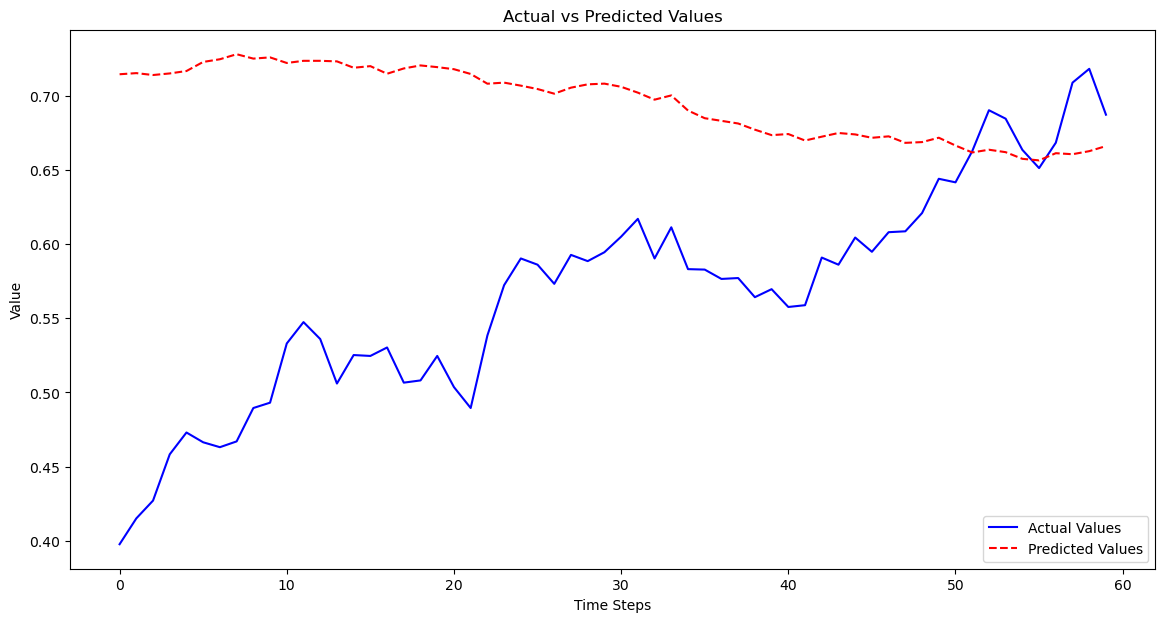

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Plotting function
def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(14, 7))
    plt.plot(y_true, label='Actual Values', color='b')
    plt.plot(y_pred, label='Predicted Values', color='r', linestyle='--')
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Call the plotting function
plot_predictions(y_test, y_pred)

In [7]:
predict0 = []
for i in range(10):
    model.fit(X_train, y_train, batch_size=32, epochs=50)

    predictions = model.predict(X_test)

    dummy = np.zeros((len(predictions), df_na.shape[1]))
    dummy[:, 0] = predictions[:, 0]
    predictions1 = scaler.inverse_transform(dummy)[:, 0]

    mse = np.mean((predictions1 - y_test) ** 2)
    acc = 100 * (1 - np.sqrt(np.mean(np.square((y_test - predictions1) / y_test))))

    print(f"mse: {mse}")
    print(f"acc: {acc}")
    predict0.append(predictions1)
    


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0947
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0702
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0322
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0111
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0504
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0325
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0086
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0058
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0049
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0049
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0033
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0037
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0054
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0030
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0052
Epoc

KeyboardInterrupt: 

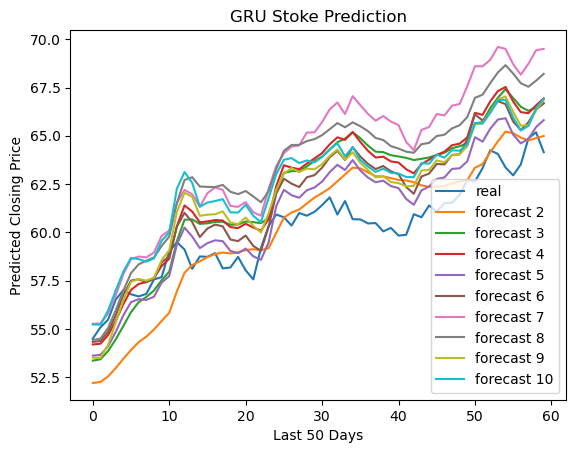

In [ ]:
# dummy = np.zeros((len(y_test), df_na.shape[1]))
# dummy[:, 0] = y_test
# y_test = scaler.inverse_transform(dummy)[:, 0]

plt.plot(y_test, label='real')
for i in range(1,10):
    plt.plot(predict0[i], label='forecast %d'%(i + 1))
plt.title('Transformer Stoke Prediction')
plt.xlabel('Last 50 Days')
plt.ylabel('Predicted Closing Price')
plt.legend()
plt.show()

In [ ]:
import ta
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import akshare as ak
from datetime import datetime, timedelta


model1 = tf.keras.models.load_model('my_model.keras')
TIMESTEP = 32
current_date = datetime.now()

# 计算100天前的日期
days_300_ago = current_date - timedelta(days=300)
current_date = current_date.strftime("%Y%m%d")
days_300_ago = days_300_ago.strftime("%Y%m%d")

df_na = get_data(symbol='106.TTE', start_date=days_300_ago, end_date=current_date)
scaler = MinMaxScaler()
x_values = df_na.values[:,1:]
x_values = scaler.fit_transform(x_values)


def create_time_series_data(X, time_steps):
    X_t = []
    for i in range(len(X) - time_steps):
        X_t.append(X[i:i + time_steps])  # 时间步数据
        
    return np.array(X_t)

x_values = create_time_series_data(x_values , TIMESTEP)

x_values = np.array([x_values[-1]])
predictions = model1.predict(x_values)
predictions



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/transformer.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roc'] = ta.momentum.roc(close=df.close) # Rate of Change (ROC)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/transformer.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'] = ta.momentum.rsi(close=df.close) # Relative Strength Index (RSI)
/Users/wangxinyu/Documents/Msc(AI)_Courses/COMP7409/COMP7409_2025_Project/transformer.py:30

array([[0.6564233]], dtype=float32)

In [11]:
x_values.shape


(32, 32, 10)